<a href="https://colab.research.google.com/github/kavincomp/FinalProjectSentimentAnalysis/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center><b>CM3070 Final Project</b></center> </h1>

<h2><center><b>Sentiment Analysis on the AirBnb Dataset</b></center></h2>


<h3> <b>R.A.1 Introduction</b> </h3>

<p> This project, will explore on the sentiment analysis performed on the Boston AirBnb Dataset. The dataset, sourced from Kaggle, has a massive 68275 set of records with attributes such as listing_id, id, reviewer_name, reviewer_id and comments.  All non-English comments will be detected and removed during the data processing journey, and only English language comments will be utilised for training. Various libraries such as <i> Numpy, Pandas,NLTK, Fasttext,  Matplotlib, Scikit Learn, Keras, Tensorflow, Seaborn</i>  and their associated classes shall be used for this project work. </p>

<p> The aim of this project is to create a robust deep learning model supported by the <i><b>GRU</b></i> neural network model architecture, that can predict the sentiment label i.e either positive, negative or neutral based on the on the usage of words and tone of the review made by the customer in the comments. The available data has been split on a 70 - 30 split , where the 70% will be used to train the model and the 30% to test the model. Though, it is straightforward in determining the sentiment using the compound scores, a deep learning model will shine in capturing intricate patterns, adapting to diverse data sources, and automating the extraction of nuanced features, thus enabling more accurate and contextually informed sentiment predictions for a wide array of text data.</p>



<h2><b> R.A.2 Importing the Necesssary Libraries</b> </h2>

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Concatenate
from keras.utils import to_categorical


<h2><b>R.A.3 Retrieving the dataset from Google Drive</b></h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

file_path = '/content/drive/My Drive/Colab Notebooks/SentimentAnalysis/reviews.csv'

boston_data=pd.read_csv(file_path)


<h2><b>R.A.4 Exploratory Data Analysis & Data Preprocessing</b></h2>


In [ ]:
print(boston_data)

       listing_id        id        date  reviewer_id reviewer_name  \
0         1178162   4724140  2013-05-21      4298113       Olivier   
1         1178162   4869189  2013-05-29      6452964     Charlotte   
2         1178162   5003196  2013-06-06      6449554     Sebastian   
3         1178162   5150351  2013-06-15      2215611        Marine   
4         1178162   5171140  2013-06-16      6848427        Andrew   
...           ...       ...         ...          ...           ...   
68270     7462268  80537457  2016-06-18     22034145       Antonio   
68271     7462268  83640094  2016-07-03     40052513         Steve   
68272     7462268  85797088  2016-07-13     77129134          Nick   
68273     7462268  97264637  2016-08-26     15799803           Vid   
68274     7462268  98550693  2016-08-31     90128094       Arianna   

                                                comments  
0      My stay at islam's place was really cool! Good...  
1      Great location for both airport an


<h3><b> R.A.4.1 Natural Language Processing and Sentiment Scores </b></h3>
<br>


<h4><b> R.A.4.1.1 Language Detection </b> </h4>
<p> Using <i><b>fasttext</b></i> library, the language of the comment will be analysed and they will be assigned laguage labels. Example <i>__label__en</i> stands for English and <i>__label__fr</i> stands for French.</p>

In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=4973a1b24ac93a5e4bc85ffdcc85547dca537bfcb8112f005b9a0f8fa76450eb
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext
file_path2 = '/content/drive/My Drive/Colab Notebooks/SentimentAnalysis/lid.176.bin'

model = fasttext.load_model(file_path2)


<h5> <b>R.A.4.1.2 Removing NaN Values and Updating the Dataframe:</b> </h5>

<p> NaN(Not a number) i.e the comment section fields not having any meaningful information. These values are necessarily to be removed during data analysis process. These values might affect the reliability of the model and disrupt the performance of the model.By removing them, the data becomes more consistent and suitable for analysis. </p>


In [ ]:
boston_data = boston_data.dropna(subset=['comments'])


<h4> <b>R.A.4.1.3 Language Labelling:</b></h4>
<p> An empty list named <i>"language_list"</i> is created which stores all the language labels predicted through the fasttext model. The "language_list" is then appended to the dataset as a new column named <i>'language'</i>. </p>

In [ ]:
language_list = []


for comment in boston_data['comments']:
  language_list.append(model.predict(comment.replace("\n",""))[0][0])

boston_data['language']=language_list

print(boston_data[['comments'  , 'language']].head(6))


                                            comments     language
0  My stay at islam's place was really cool! Good...  __label__en
1  Great location for both airport and city - gre...  __label__en
2  We really enjoyed our stay at Islams house. Fr...  __label__en
3  The room was nice and clean and so were the co...  __label__en
4  Great location. Just 5 mins walk from the Airp...  __label__en
5  A truely exeptional place to stay. The hosts a...  __label__en


<h3><b>R.A.4.1.4 Non English Comments</b>
 </h3>

<p> Removal of  non-English comments is important in a sentiment analysis project to ensure the quality and accuracy of the analysis. Non-English comments  contain words, phrases, or sentiments that the model is not trained to understand, leading to misclassification, reduced performance and accuracy issues.<br> <br>With English being widely adopted language in the world, there is ample amount of data available regardless the removal of other language comments. With English comments, the model can better capture the sentiment nuances of the target language and provide more meaningful insights.</p>

In [ ]:
non_en_comments = boston_data[boston_data['language'] != '__label__en']

print(non_en_comments.head())
print("\nTotal no.of rows with Non-English language comments:", non_en_comments.shape[0])


     listing_id        id        date  reviewer_id reviewer_name  \
12      1178162   8372308  2013-10-28      8837991    Olga Maria   
50      1178162  20020224  2014-09-22     18640669         Marie   
55      1178162  20513074  2014-09-30      5536373     Kimberley   
83      1178162  25051451  2015-01-05     24947394          Anna   
121     1178162  35239731  2015-06-16     33981202     Catherine   

                                              comments     language  
12   Mi estadía en Boston aunque corta fue muy buen...  __label__es  
50   La maison située dans East Boston était sympat...  __label__fr  
55   De kamer wordt verhuurd via een "self-check in...  __label__nl  
83   Una casa muy acogedora, muy cerca (a menos de ...  __label__es  
121  Izzy nous a fait sentir très bien dès notre ar...  __label__fr  

Total no.of rows with Non-English language comments: 3570


In [ ]:
boston_data = boston_data[boston_data['language']=='__label__en']

print("\nTotal no. of rows:",boston_data.shape[0])
print("\nTotal no. of columns:",boston_data.shape[1])

print(boston_data.head(  ))


Total no. of rows: 64652

Total no. of columns: 7
   listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments     language  
0  My stay at islam's place was really cool! Good...  __label__en  
1  Great location for both airport and city - gre...  __label__en  
2  We really enjoyed our stay at Islams house. Fr...  __label__en  
3  The room was nice and clean and so were the co...  __label__en  
4  Great location. Just 5 mins walk from the Airp...  __label__en  


<h3><b>R.A.5 Analysing Comment Sentiments</b> </h3>
<p> <i> Using <b>Natural Language Tool Kit</b> </i> library's <i><b>SentimentIntensityAnalyzer()</b></i>, the sentiment of the comment will be analysed and scores will be assigned.</p>
<p> <i><b>VADER</b></i> stands for <b>Valence Aware Dictionary and Sentiment Reasoner</b>. It is a pre built dictionary of words and their associated sentiment scores.</p>

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

#NLTK Vader Documentation

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<h4><b>R.A.5.1 Assigning Sentiment Scores</b> </h4>

<p> The <b><i>sia.polarity_scores()</i></b> function is applied, which returns a dictionary containing polarity scores (numerical values that indicate the proportion of the sentiment) for postive, negative, neutral and compound sentiments.</p> <br>
<p> Compound Scores is a single numerical value that represent the overall sentiment of the text. In other words, its a value that combines the overall sentiment polarity scores(positive, negative and neutral). </p> <br>
<li> The sentiment polarity scores range from -1(indicating extreme negative) to +1(indiciating extreme positive).</li>
<li> These individual scores are then combined to calculate the compound scores by <b>VADER</b> of NLTK.</li>
<b><li> Positive: Compound Score > 0.05</li> <li> Negative: Compound Score < -0.05 </li>
<li> Neutral : Between -0.05 to +0.05 inclusive. </li></b>


In [ ]:
boston_data['sentiment_scores'] = boston_data['comments'].apply(lambda x: sia.polarity_scores(x))
#NLTK Vader Documentation

In [ ]:
print(boston_data[['comments','sentiment_scores']])

                                                comments  \
0      My stay at islam's place was really cool! Good...   
1      Great location for both airport and city - gre...   
2      We really enjoyed our stay at Islams house. Fr...   
3      The room was nice and clean and so were the co...   
4      Great location. Just 5 mins walk from the Airp...   
...                                                  ...   
68269  Wonderful location. Bus stop right at the corn...   
68271  Joe was on his way to Jamaica to be married! o...   
68272  The room was very clean as were the bathrooms ...   
68273  Staying in Lower Allston at Joe and Nancy's pl...   
68274  The room itself and the aprtment were very cle...   

                                        sentiment_scores  
0      {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...  
1      {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...  
2      {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...  
3      {'neg': 0.0, 'neu': 0.673, 'pos': 0.



<p>The following code snippe assigns the compound scores to the dataframe. </p>

In [ ]:
boston_data['compound_score'] = boston_data['sentiment_scores'].apply(lambda x: x['compound'])

<h4><b>R.A.5.2 Updated dataset with Sentiment scores and Compound scores</b> </h4>

In [ ]:
print(boston_data[['comments', 'sentiment_scores', 'compound_score']])

                                                comments  \
0      My stay at islam's place was really cool! Good...   
1      Great location for both airport and city - gre...   
2      We really enjoyed our stay at Islams house. Fr...   
3      The room was nice and clean and so were the co...   
4      Great location. Just 5 mins walk from the Airp...   
...                                                  ...   
68269  Wonderful location. Bus stop right at the corn...   
68271  Joe was on his way to Jamaica to be married! o...   
68272  The room was very clean as were the bathrooms ...   
68273  Staying in Lower Allston at Joe and Nancy's pl...   
68274  The room itself and the aprtment were very cle...   

                                        sentiment_scores  compound_score  
0      {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...          0.9626  
1      {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...          0.9061  
2      {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp.

<h3><b>R.A.6 Defining the Length of Sequences </b></h3>

<p> <i>The max_words</i> variable determines the maximum vocabulary (unique words) size for training and <i>max_sequence_length</i> variable determines the maximum number of words in a sequence which is fed into the model. These values help in standardisation of the data being input into the model.</p><br>
<p> <b> Example Sentence : "The cat and the dog went on a walk."</b><br>.

The above sentence has 9 words and 8 unique words( 'the' repeating twice). By specifying the max words, the most common unique words will be counted. Eg: if max_words = 7 then the 7 most common unique words will be counted and the eighth will be ignored. </p>
<p> Assume, the sentence above is a sequence with max_sequence_length = 9. If the sequence length > 9, then the sequence will be truncated so all the inputs are of the same length. Similarly if the sequence length < 9, they will be padded. </p>

<br>

<p> The code below specifies the <b><i>max_words = 1000</i></b> and <b><i>max_sequence_length=100.</i></b></p>

In [ ]:
max_words = 1000
max_sequence_length = 100

<h3><b>R.A.7 Tokenization</b></h3>
<p> Tokenization is an important NLP task undertaken to break a sequence of text into token or smaller units.Words and subwords are typical example of tokens.</p>

<p>Using the <b><i>Tokenizer</b></i> class of the Keras library, further processes the input data. The <b><i>num_words</b></i> parameter specifies the maximum number of words to keep in the vocabulary, (most frequent words). In this case <b><i>num_words = max_words</i></b>. The less frequent words are discarded. </p>

<p>The <b><i>fit_on_texts</b></i> method takes a collection of data and learns the vocabulary by assigning unique integer index to each unique word. The frequency is also computed. This processing of the 'comments' data is for further processing, so that the data can be input into the model.</p>



In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(boston_data['comments'])

#TensorFlow Documentation

<h3><b>R.A.8 Preparation</b></h3>
<li>Tokenizer processes the text data into numerical sequences (indices of vocabulary)</li>
<li><b><i>pad_sequences()</b></i> takes the sequences obtained and pads them with zeros to ensure a uniform length not more than the max_sequence_length</li>
<li>The last line of code reshape the compound sentiment scores  into a 2D array.Aligning the sentiment scores with its associated  text('comments')data </li>

In [ ]:
sequences = tokenizer.texts_to_sequences(boston_data['comments'])
X_text = pad_sequences(sequences, maxlen=max_sequence_length)
X_sentiment = boston_data['compound_score'].values.reshape(-1, 1)

<h3><b>R.A.9 Assigning Sentiment Labels</b> </h3>

<p> Assignment of sentiment labels either positive, negative or neutral based on the compoound sentiment scores.These sentiment labels will be the target variable ('y') the variables to which the inputs will be mapped.The range of compound scores and their associated sentiment labels have been explained in <b>Section R.A.5.1: Assigning Sentiment Scores</b> </p>

In [ ]:
boston_data['sentiment_label'] = boston_data['compound_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

<h3><b>R.A.10 Label Mapping and One-Hot Encoding</b></h3>
<li><b><i>label_mapping</i></b> defines the mapping between sentiment labels and their associated numerical values. i.e <b><i>postive:0, neutral:1, negative:2</b></i>where the numbers represent the corresponding index numbers of the labels.</li>
<li>The second line of code applies the label mapping to the sentiment labels column</li>
<li>The last line of code performs one-hot encoding. Converts them to binary arrays of the format eg: [0,0,1] where 1 indicates the label index. This format is the suitable one for training the model.</li>

In [ ]:
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
boston_data['sentiment_label'] = boston_data['sentiment_label'].map(label_mapping)
y = to_categorical(boston_data['sentiment_label'], num_classes=3)


<h2><b>R.A.11 Model Development</b></h2>


<h2><b>R.A.11.1 Train and Test Data Split</b></h2>
<p>Finally with the data being preprocessed, it  can be now fed into the model. It will be split into the ratio of 70-30 where 70% of the data will used for training and 30% will be used for testing which helps to evaluate the model.
</p>



In [ ]:
X_text_train, X_text_test, X_sentiment_train, X_sentiment_test, y_train, y_test = train_test_split(X_text, X_sentiment, y, test_size=0.3, random_state=42)

<h2><b>R.A.11.2 Building the Neural Network Model</b></h2>

In [ ]:
from keras.layers import Input
from keras.regularizers import l1,l2
from keras.layers import Dropout
from keras.layers import BatchNormalization

<li>The input layer is the layer where, the data is fed into the model.The shape parameter defines the length of the data that shall be input, i.e <i><b>max_sequence_length</i></b></li>
<br>
<li> An embedding layer is a fundamental component in NLP models. It transforms tokens into continuos vector representations, in other words, each words get mapped to numerical vectors which will represent the linguistic properties of the text.This helps the model to understand the semantics of the word and how they are associated with the other words of the sequence and its context with ease. <i><b>embedding_dim</i></b> specifies the embedding space, where these vectors will be represented.100 in this case, explains that the text data will be represented by a <b>vector of length 100</b>.</li>
<b>Example Sentence : Dog Chased Cat </b>
<p>Assume Embedding Dim = 2. These words will be represented by vectors of length 2. They are numerical values based on the linguistics of the word. Lets assume few hypothetical values.<li> 'cat' : [0.5, 0.3] </li>
<li> 'chased' : [-0.2, 0.7] </li>
<li> 'dog': [0.4, 0.2] </li>

<p> In the above values of the three words, the reprsentation of vectors of dog and cat are closer than it is to chase. This displays the close semantic relationship between both such as being pets, animals and mammals. </p> <br>
<li>The GRU output layer, then processes processes the embedded vectors, to learn about the data and capture its patterns and dependencies.</li>
<br>
<li> Dropout is a regularisation technique used to prevent overfitting. Overfitting is when, the model performs better in training dataset, and it fails to achieve the same accuracy in the test set as it did in training set. Dropping out involves, randomly dropping several neurons of the network, letting the network to learn more diverse patterns of the data. This improves generalisation of the model, not only performing well for the training dataset.</li>
<br>
<li> L1 and L2 are regularizers utilised in machine learning, to prevent overfitting of the models. When there are irrelvant or redundant features in the data, L1 regularisation may be used by adding penalty term to the loss function based on the absolute values of the weights.L1 encourages some coefficients to become zeroes which results in feature selection. This allows the data(features) which had been not observed well by the model to be considered by the model.<br>
L2 regularisation techniques adds a penalty term based on the squared values of the model's weights. It makes coefficients to be small but not zero, unlike L1. Both L1 and L2 lead to better generalisation and reduce overfitting efficiently.</li>








In [ ]:
embedding_dim = 100
text_input = Input(shape=(max_sequence_length,), name='text_input')
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(text_input)
embedding_layer= Dropout(0.3)(embedding_layer)


gru_output = GRU(64, kernel_regularizer=l1(0.01), recurrent_regularizer=l2(0.01))(embedding_layer)

gru_output = Dropout(0.5)(gru_output)

#KerasDocumentation-Layers-GRU
#Chollet, F. 'Deep Learning with Python'

The <b><i>sentiment_input</i></b> represents the Input layer which will feed the model with the associated sentiment score of each comment.

In [ ]:
sentiment_input = Input(shape=(1,), name='sentiment_input')

<p>The following layer concatenates, the <b><i>gru_output</i></b> and the <b><i>sentiment_input</b></i> . This allows to merge the comment data and its associated sentiment reprsentations into the subsequent `layers of the model.</p>

In [ ]:
concatenated = Concatenate()([gru_output, sentiment_input])


<p>A hidden layer is a set of interconnected neurons accompanied with an activation function.They are responsible for processing and transforming the fed data.  The following is a dense hidden layer with 64 neurons. It receives the output from the concatenated layer and utilises the activation function named <b><i>'relu'</b></i>and produces the output. A dropout rate of 0.5 has been determined for regularisation.  </p>

In [ ]:
hidden_layer1=Dense(64,activation='relu')(concatenated)
hidden_layer1=Dropout(0.5)(hidden_layer1)


##hidden_layer2=Dense(64, activation='relu')(hidden_layer1)
##hidden_layer2=Dropout(0.5)(hidden_layer2)

##hidden_layer3=Dense(64, activation='relu')(hidden_layer2)
##hidden_layer3=Dropout(0.25)(hidden_layer3)


#Chollet, F. 'Deep Learning with Python'

<p> The <b><i>output_layer</b></i> is the final layer of the model. It is connected to <b><i>hidden_layer1</b></i> and is a dense layer. The number <b>3</b> corresponds to the number of neurons, which specifies the number of classes in the problem (i.e postive, neutral and negative). The activation function <b><i>'softmax'</b></i> ensures the output is bneing normalised into a probability distribution over the classes.It is usually used in multi-class classifications. </p>

In [ ]:
 output_layer = Dense(3, activation='softmax')(hidden_layer1)


<p> The following code defined the model architecture using the functional Keras API. It defined the input layer and the input to be accepted, and its output.</p>

In [ ]:

from keras.models import Model

In [ ]:
model = Model(inputs=[text_input, sentiment_input], outputs=output_layer)


<h3><b>R.A.11.3 Optimizers and Learning Rates</b></h3>
<p> Optimizers are crucial to minimise the loss of the model during its deployment. Addtionally, the <b>learning_rate</b> is a hyperparamter that determines the size of the adjustments that shall be made by the optimizer in each iteration. In this model, the '<b>Adam</b>' optimizer is being used. Adam stands for <i>Adaptive Moment Estimation</i>. It functions by deploying adaptive elearning rates and momentum</p>

In [ ]:
from keras.optimizers import Adam
from keras.optimizers import SGD

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)


<h3><b>R.A.11.4 Compiling the Model</b></h3>
<li>The optimizer is defined as Adam</li>
<li>The loss 'categorical_crossentropy' measure the difference between predicted and actual values.</li>
<li>The model performance is evaluated based on its Accuracy of prediction.</li>

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Chollet, F. 'Deep Learning with Python'


<h3><b>R.A.11.5 Regularizer - Early Stopping </b></h3>

<p>Early Stopping is a regularization technique which stops the training if the validation loss does not improve. During the course of training , the validation loss tend to drop, showing that the model is improving its performance. If it doesnt , the <i><b>early_stopping</i></b> callback, interrupts the training and stops. This way, overfitting is prevented.The patience parameter determines the threshold from which the callback can begin its interruption, if needed. </p>

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 75, restore_best_weights=True)

#KerasDocumentation-EarlyStopping


<h3><b>R.A.11.6 Learning Rate Scheduler</b> </h3>
<p> A learning rate scheduler, enables to dynamically adjust the learning rate of the model. It fine tunes the learning rate based on the training process , allowing the model to reach a better solution. This method supports with an improved training efficiency.</p>

In [ ]:
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):

    if epoch < 10:
       return lr
    else:
       return lr * 0.1 if epoch < 75 else lr * 0.01


lr_scheduler = LearningRateScheduler(lr_schedule)

#KerasDocumentation-LR Scheduler

<h1><b> R.A.12 Training the Model </b></h1>

<p> With the architecture and configurations of the model being set, the model shall perform its training.</p>

<li>'epochs' stands for the number of cycle of iterations, the data will be processed through the model. The epoch is being set as 100.</li>
<li>Batch Size = 128, explains that, 128 samples will be used for training, in a single cycle. After processing 128 samples, the models weights are being adjusted and updated accordingly.</li>
<li>The training data will be further split into training and validation data. The model will train itself with the training data and evaluate its perfomance through the validation set. Validation sets are crucial, as they help to identify signs of overfitting in the model. It assists in the evaluation and assessment of the model,and helps it to generalize to unseen data.</li>

In [ ]:
history = model.fit([X_text_train, X_sentiment_train], y_train, epochs=100 , batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])


#Chollet, F. 'Deep Learning with Python'


Epoch 1/100
283/283 [==============================] - 33s 82ms/step - loss: 2.7648 - accuracy: 0.9472 - val_loss: 0.0934 - val_accuracy: 0.9755 - lr: 0.0010
Epoch 2/100
283/283 [==============================] - 5s 18ms/step - loss: 0.0861 - accuracy: 0.9776 - val_loss: 0.0562 - val_accuracy: 0.9969 - lr: 0.0010
Epoch 3/100
283/283 [==============================] - 3s 11ms/step - loss: 0.0626 - accuracy: 0.9856 - val_loss: 0.0468 - val_accuracy: 0.9962 - lr: 0.0010
Epoch 4/100
283/283 [==============================] - 5s 16ms/step - loss: 0.0543 - accuracy: 0.9893 - val_loss: 0.0426 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 5/100
283/283 [==============================] - 3s 11ms/step - loss: 0.0476 - accuracy: 0.9924 - val_loss: 0.0395 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 6/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0449 - accuracy: 0.9930 - val_loss: 0.0376 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 7/100
283/283 [==============================] - 3s

<h3><b>R.A.13 Visualising the Model </b></h3>

<p> The following illustration describes the architecture of the model. </p>


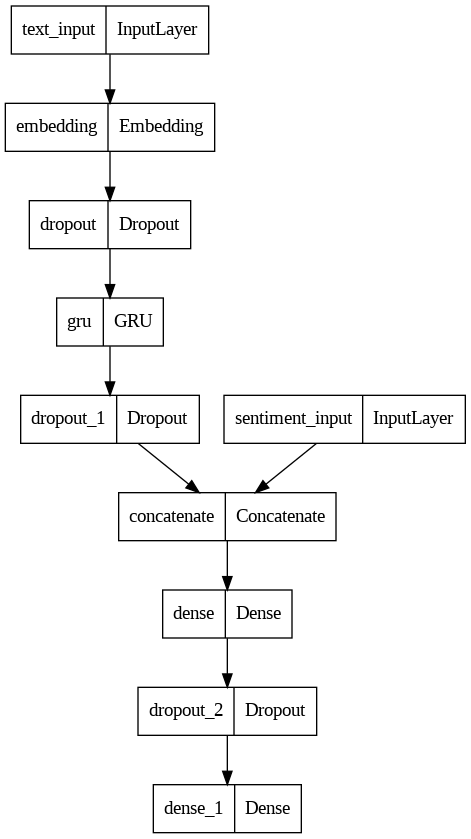

In [ ]:
from keras.utils import plot_model
model_picture = Model(inputs=[text_input, sentiment_input], outputs=output_layer)
plot_model(model, to_file='model_architecture.png', show_shapes=False, show_layer_names=True)

<h2><b>R.A.14 Learning Rate Scheduler Graph</b></h2>

<p> The learning rate scheduler dynamically adjusts the learning rate in accordance with the varying performance(loss, accuracy) of the training. The following plot describes how the learning_rate was adjusted through the course of the training journey, to achieve the optimized performance. </p>`

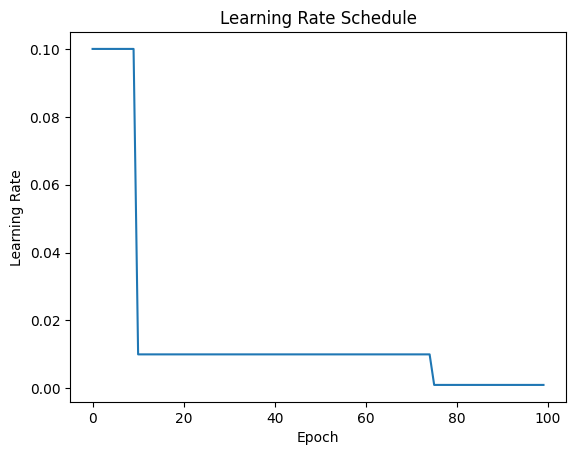

In [ ]:
import matplotlib.pyplot as plt
lr = 0.1
num_epochs = 100
learning_rates = [lr_schedule(epoch, lr) for epoch in range(num_epochs)]

plt.plot(range(100 ), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()



<h2><b>R.A.15 Results</b></h2>

<h3> <b>R.A.15.1 Training  vs Validation :  Accuracy and Loss </b></h3>


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Training Loss: 0.0136, Training Accuracy: 0.9962
Validation Loss: 0.0103, Validation Accuracy: 0.9967


<h2><b>R.A.15.2 Training vs Validation Graphs </b></h2>
<p> The following plots illustrate the accuracy and loss curves retrived from the performance of the model over the training and validation sets.The validation accuracy has been consistent, the training accuracy curve falls below the validation curve.Moreover the graphs doesnt display any signs of overfitting.The loss curves represents the loss being less than 0.5 and being consistent.The accuracy graph displays a desired performance output of the model powered by the robust neural network model along with contributions of the regularizers and callbacks and configurations. The loss curves represents the loss being less than 0.5 and being consistent. </p>

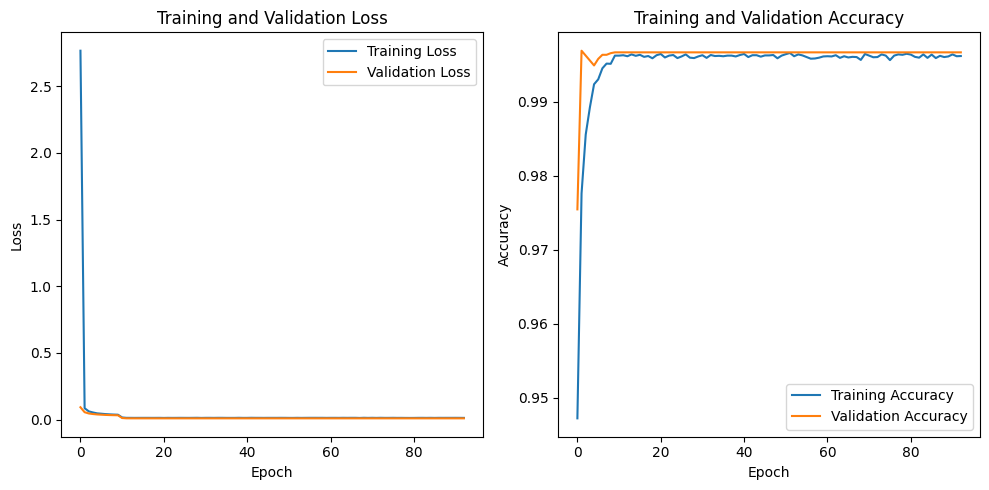

In [ ]:

 import matplotlib.pyplot as plt

# Assuming you have already defined the variables train_loss, train_accuracy, val_loss, and val_accuracy

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


<h3> <b>R.A.16 Fitting The Model with the Test Set</b> </h3>
<p> With the observed , training and validation accuracies, now the model is suitable to be tested on a test set. The test set is 30% of the original data and was separated in the initial steps of training during the model setup. </p>


In [ ]:
loss, accuracy = model.evaluate([X_text_test, X_sentiment_test], y_test, batch_size=128)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


152/152 [==============================] - 1s 4ms/step - loss: 0.0100 - accuracy: 0.9975
Test Loss: 0.0100, Test Accuracy: 0.9975


<h3> <b>R.A.17 Confusion Matrix</b> </h3>
<p> The confusion matric displays the performance of the classfication model on the test set
which was developed above. It represents: <br>
<li>True Positives : Predicted positive and is actually positive.</li>
<li>False Positives: Predicted Positive but is negative</li>
<li>True Negatives: Predicted negative and is actually negative.</li>
<li>False Negatives: Predicted Negative but is actually positive.

607/607 [==============================] - 3s 4ms/step


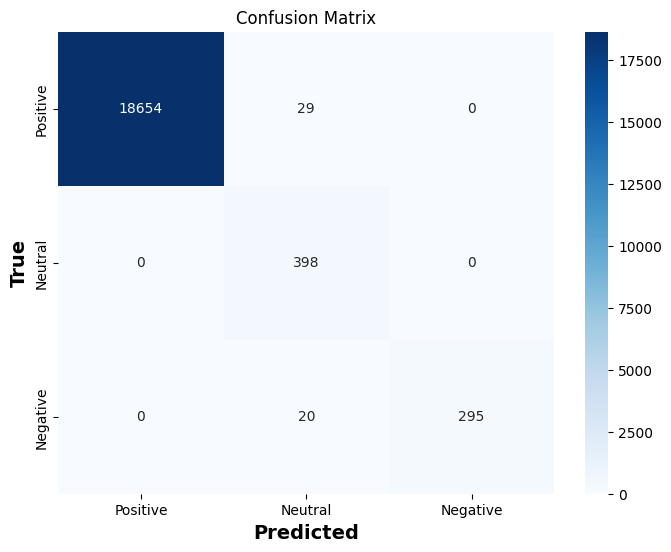

In [ ]:
#confusion matrix code

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict sentiment labels for the test dataset
y_pred = model.predict([X_text_test, X_sentiment_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Create confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Define class labels
class_labels = ['Positive', 'Neutral', 'Negative']

#defining the plot
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, fontweight='bold')

plt.ylabel('True', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix')
plt.show()
